Text(0.5, 1.0, 'Archemedian spiral')

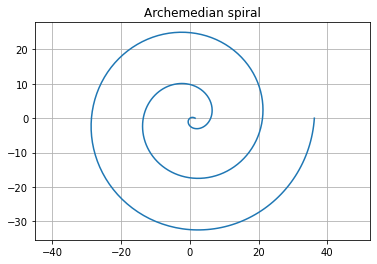

In [132]:
#Lecture 5.2
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
#Example 5.2.1: Archimedean spiral
a = 1.5
b = -2.4
t = np.linspace(0,5*np.pi,500)
x = (a+b*t)*np.cos(t)
y = (a+b*t)*np.sin(t)
plt.plot(x,y)
#plt.plot([-40, 40], [0,0], color = 'grey')
plt.axis('equal') # makes the plot square, i.e. tick marks are equally spaced
# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axis_equal_demo.html
plt.grid()
plt.title('Archemedian spiral')

Text(0.5, 1.0, 'Logarithmic spiral')

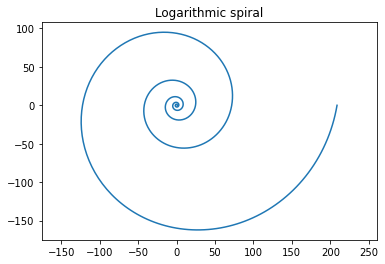

In [134]:
#Example 5.2.2: Logarithmic spiral
a = 1
k = 0.17
t = np.linspace(0,10*np.pi,1000)
x = a*np.exp(k*t)*np.cos(t)
y = a*np.exp(k*t)*np.sin(t)
plt.plot(x,y)
plt.axis('equal')
plt.grid()
plt.title('Logarithmic spiral')

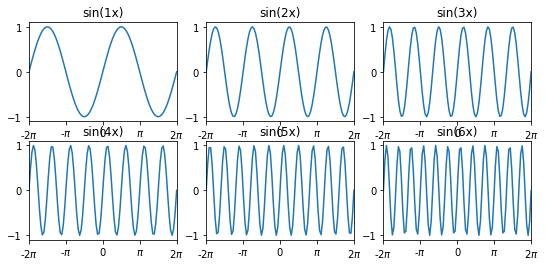

In [126]:
#Example 5.2.3: For-loop that changes the frequency of sin(x) and creates additional
#subplot for each iteration
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
x = np.linspace(-2*np.pi,2*np.pi,100) #creates x-values from -2PI to 2PI
fig = plt.figure(figsize=[9,4]) #creates figure object of width 9 x height 4
for i in range(1,7): #iterates from i (1 to 6)
    plt.subplot(2,3,i) #2 rows x 3 columns
    plt.plot(x,np.sin(x*i)) #sin(i*x) 
    plt.title('sin('+str(i)+'x)') #plots title
    plt.xticks([-2*np.pi,-1*np.pi,0,np.pi,2*np.pi],('-2$\pi$','-$\pi$','0','$\pi$','2$\pi$'))
    plt.xlim([-2*np.pi,2*np.pi]) #restricts x values to between -2PI and 2PI
    
#plt.legend(loc='best')
#fig.tight_layout() # improves the layout of  the figures



In [145]:
#Example 5.2.4: Multi-panel plot showing the probability density function for different modes of
#atmospheric circulation across nuclear war scenarios.
import numpy as np
import scipy.stats
from scipy.stats import ks_2samp; 
import requests
import io
import matplotlib
import matplotlib.pyplot as plt

#get AO and NAO data from my website using my retrieve_npy function
def retrieve_npy(link): #requires import io and import numpy as np statements
    try:
        response = requests.get(link)
        response.raise_for_status()
        data = np.load(io.BytesIO(response.content),allow_pickle=True,encoding='latin1').item()
        return data
    except:
        print('Error getting data: '+link)
    
AOdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_ao.npy')
NAOdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_nao.npy')
PNAdata = retrieve_npy('http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_pna.npy')


Error getting data: http://people.envsci.rutgers.edu/jlc449/AO/manuscript/npy/data_pna.npy


In [146]:
kde = {}; pval = {}; #create dictionaries for kernal density estimates and p-values 
t_range = np.linspace(-4,4,360) # PDF will be bounded by [-4,4] and there will be 360 increments (dx = 0.02228)
#cases to use for CESM-WACCM4, and set casenames for labels using 'loading' variable. 
cases = ['nw_ur_150_07', 'nw_targets_05', 'nw_targets_03', 'nw_targets_02', 'nw_targets_04', 'nw_targets_01x']
loading={}
loading['nw_ur_150_07'] = '150 Tg US-Russia'; 
loading['nw_targets_02'] = '27.3 Tg India-Pakistan'
loading['nw_targets_03'] = '37 Tg India-Pakistan'
loading['nw_targets_04'] = '16 Tg India-Pakistan'
loading['nw_targets_05'] = '46.8 Tg India-Pakistan'
loading['control'] = '0 Tg Control Ens 1'
loading['nw_targets_01x'] = '5 Tg India-Pakistan'

#
# Generate kernel density estimates, an estimate of the probability density function in a non-parametric way.
#

#panel 1: AO CESMLE
kde['AO CESMLE CLIMO'] = scipy.stats.gaussian_kde(np.array(AOdata['CESMLE CLIMO']),bw_method=None)
kde['AO CESMLE 1982/1991'] = scipy.stats.gaussian_kde(np.array(AOdata['CESMLE 1982/1991']),bw_method=None)
#uses Kolmogorov-Smirnov statistical test to determine if two PDFs are statistically distinct
pval['AO CESMLE 1982/1991'] = ks_2samp(kde['AO CESMLE 1982/1991'].pdf(t_range),kde['AO CESMLE CLIMO'].pdf(t_range)).pvalue

#panel 2: AO AMIP
kde['AO AMIP CLIMO'] = scipy.stats.gaussian_kde(np.array(AOdata['AMIP CLIMO']),bw_method=None)
kde['AO AMIP 1982/1991'] = scipy.stats.gaussian_kde(np.array(AOdata['AMIP 1982/1991']),bw_method=None)
pval['AO AMIP 1982/1991'] = ks_2samp(kde['AO AMIP 1982/1991'].pdf(t_range),kde['AO AMIP CLIMO'].pdf(t_range)).pvalue

#panel 3: AO nuclear war simulations
case = 'control'; kde['AO '+case] = scipy.stats.gaussian_kde(np.array(AOdata[case]),bw_method=None)
for case in cases:
  kde['AO '+case] = scipy.stats.gaussian_kde(np.array(AOdata[case]),bw_method=None)
  pval['AO '+case] = ks_2samp(kde['AO '+case].pdf(t_range),kde['AO control'].pdf(t_range)).pvalue


#panel 4: NAO CESMLE
kde['NAO CESMLE CLIMO'] = scipy.stats.gaussian_kde(np.array(NAOdata['CESMLE CLIMO']),bw_method=None)
kde['NAO CESMLE 1982/1991'] = scipy.stats.gaussian_kde(np.array(NAOdata['CESMLE 1982/1991']),bw_method=None)
pval['NAO CESMLE 1982/1991'] = ks_2samp(kde['NAO CESMLE 1982/1991'].pdf(t_range),kde['NAO CESMLE CLIMO'].pdf(t_range)).pvalue

#panel 5: NAO AMIP
kde['NAO AMIP CLIMO'] = scipy.stats.gaussian_kde(np.array(NAOdata['AMIP CLIMO']),bw_method=None)
kde['NAO AMIP 1982/1991'] = scipy.stats.gaussian_kde(np.array(NAOdata['AMIP 1982/1991']),bw_method=None)
pval['NAO AMIP 1982/1991'] = ks_2samp(kde['NAO AMIP 1982/1991'].pdf(t_range),kde['NAO AMIP CLIMO'].pdf(t_range)).pvalue

#panel 6: NAO nuclear
case = 'control'; kde['NAO '+case] = scipy.stats.gaussian_kde(np.array(NAOdata[case]),bw_method=None)
for case in cases:
  kde['NAO '+case] = scipy.stats.gaussian_kde(np.array(NAOdata[case]),bw_method=None)
  pval['NAO '+case] = ks_2samp(kde['NAO '+case].pdf(t_range),kde['NAO control'].pdf(t_range)).pvalue; print(case)


# Create strings of p-values to use for plot
for key in pval.keys():
  if pval[key] < 0.01:
    pval[key] = '<0.01'
  else:
    pval[key] = str(pval[key])[0:4]

nw_ur_150_07
nw_targets_05
nw_targets_03
nw_targets_02
nw_targets_04
nw_targets_01x


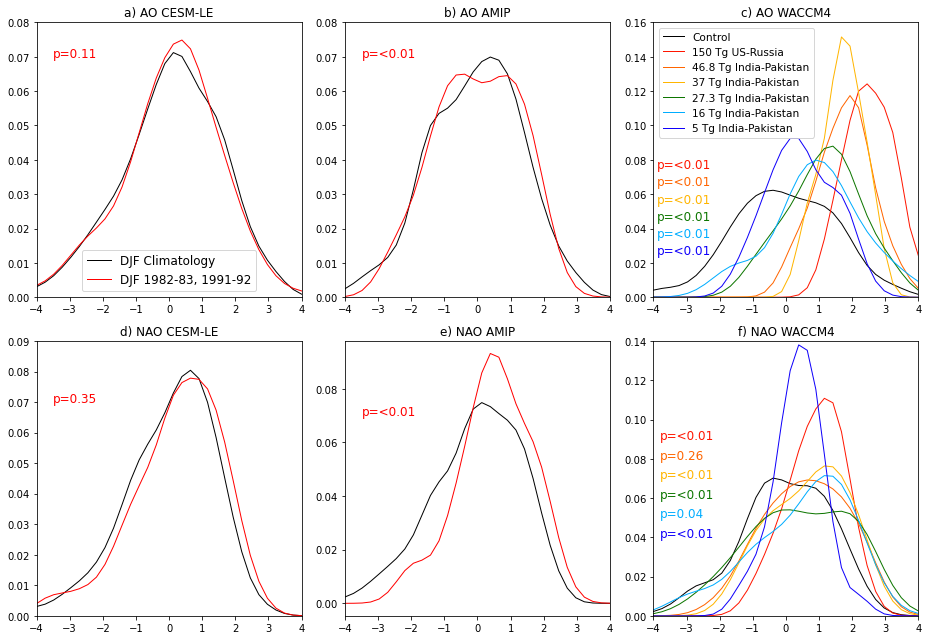

In [148]:

#
#Generate plot
#
bar_graph = False  #True to include bars, False to just plot the PDF lines.
#Setting a different t_range for plotting, so that the bars can actually be seen:
t_range = np.linspace(-4,4,32) # PDF will be bounded by [-4,4] and there will be 32 increments (dx = 0.02228)
dx = 1*abs(t_range[0])-abs(t_range[1])

plt.figure(figsize=[13,9]) #initialize figure 
nr = 2; nc = 3; f1=12   #nr = number of rows, nc = number of columns, f1 = default font size 
plt.subplot(nr,nc,1) #panel 1 CESMLE 
plt.title('a) AO CESM-LE')
CASE = 'AO CESMLE CLIMO'; label = 'DJF Climatology'; color = 'k'
normalize = np.nansum(kde[CASE].pdf(t_range))**-1  #normalization factor so PDF adds up to 1.0
plt.plot(t_range,kde[CASE].pdf(t_range)*normalize,color,lw=1,label=label) #plot probability density function over t_range 

CASE = 'AO CESMLE 1982/1991'; label = 'DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE].pdf(t_range))**-1 #normalization factor so PDF adds up to 1.0
plt.plot(t_range,kde[CASE].pdf(t_range)*normalize,color,lw=1,label=label) #plot probability density function over t_range 
plt.xlim([-4,4]); plt.ylim([0,0.08])  #x and y limits for plot
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)  #add text to the plot to indicate p-values
plt.legend(loc='best',fontsize=f1)  #plot legend
if bar_graph:   #add bars to graph
 CASE = 'AO CESMLE CLIMO'
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')  #plot bars that are black with white edge color
 CASE = 'AO CESMLE 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white') #plot bars that are red with white edge color 


plt.subplot(nr,nc,2) #panel 2 AMIP
plt.title('b) AO AMIP')
CASE = 'AO AMIP CLIMO'; label = 'AMIP Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'AO AMIP 1982/1991'; label = 'AMIP DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); plt.ylim([0,0.08])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'AO AMIP CLIMO';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'AO AMIP 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')


#define colors for nuclear war simulations
color={}; color['nw_ur_150_07'] = '#FF1600'; color['nw_targets_05'] = '#FF6500'; color['nw_targets_03'] = '#FFB500'; 
color['nw_targets_02'] = '#FFF300'; color['nw_targets_02'] = '#0D7600'; color['nw_targets_04'] = '#0D7600'; 
color['nw_targets_04'] = '#00ADFF'; color['nw_targets_01x'] =   '#0F00FB'; color['nw_targets_01'] = '#0F00FB'; 
color['nw_cntrl_03'] = '#040404'; color['control'] = color['nw_cntrl_03']; 

plt.subplot(nr,nc,3) #panel 3 cesm-waccm4
plt.title('c) AO WACCM4',fontsize=f1)
CASE = 'AO control'; label = 'Control'; 
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,'k',lw=1,label=label); ITERATION = 0
plt.xlim([-4,4]); plt.ylim([0,0.16])
if bar_graph:
  bardata = kde[CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color='k',alpha=0.3,edgecolor='white')


for CASE in cases:
 label = loading[CASE]; 
 normalize = np.nansum(kde['AO '+CASE](t_range))**-1
 plt.plot(t_range,kde['AO '+CASE].pdf(t_range)*normalize,color[CASE],lw=1,label=label)
 plt.text(-3.9,0.075 - 0.01*ITERATION,'p='+str(pval['AO '+CASE])[:],color=color[CASE],fontsize=f1); ITERATION = ITERATION+1
 plt.legend(loc='best',fontsize=f1-1.5)
 if bar_graph:
  bardata = kde['AO '+CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color=color[CASE],alpha=0.3,edgecolor='white')




plt.subplot(nr,nc,4) #panel 4 CESMLE 
plt.title('d) NAO CESM-LE')
CASE = 'NAO CESMLE CLIMO'; label = 'CESM-LE Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'NAO CESMLE 1982/1991'; label = 'CESM-LE DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); plt.ylim([0,0.09])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'NAO CESMLE CLIMO'
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'NAO CESMLE 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')


plt.subplot(nr,nc,5) #panel 5 AMIP
plt.title('e) NAO AMIP')
CASE = 'NAO AMIP CLIMO'; label = 'AMIP Climatology DJF'; color = 'k'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
CASE = 'NAO AMIP 1982/1991'; label = 'AMIP DJF 1982-83, 1991-92'; color = 'r'
normalize = np.nansum(kde[CASE](t_range))**-1
plt.plot(t_range,kde[CASE](t_range)*normalize,color,lw=1,label=label)
plt.xlim([-4,4]); #plt.ylim([0,0.09])
plt.text(-3.5,0.07,'p='+str(pval[CASE])[:],color='r',fontsize=f1)
if bar_graph:
 CASE = 'NAO AMIP CLIMO';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='k',alpha=0.4,edgecolor='white')
 CASE = 'NAO AMIP 1982/1991';
 bardata = kde[CASE].pdf(t_range)*normalize
 plt.bar(t_range,bardata,width =dx,color='r',alpha=0.3,edgecolor='white')



#define colors for nuclear war simulations
color={}; color['nw_ur_150_07'] = '#FF1600'; color['nw_targets_05'] = '#FF6500'; color['nw_targets_03'] = '#FFB500'; 
color['nw_targets_02'] = '#FFF300'; color['nw_targets_02'] = '#0D7600'; color['nw_targets_04'] = '#0D7600'; 
color['nw_targets_04'] = '#00ADFF'; color['nw_targets_01x'] =   '#0F00FB'; color['nw_targets_01'] = '#0F00FB'; 
color['nw_cntrl_03'] = '#040404'; color['control'] = color['nw_cntrl_03']; 

plt.subplot(nr,nc,6) #panel 6 cesm-waccm4
plt.title('f) NAO WACCM4')
CASE = 'NAO control'; label = 'CESM-WACCM4 Climatology DJF'; 
normalize = np.nansum(kde[CASE](t_range))**-1
plt.xlim([-4,4]); plt.ylim([0,0.14])
plt.plot(t_range,kde[CASE](t_range)*normalize,'k',lw=1,label=label); ITERATION = 0
if bar_graph:
  bardata = kde[CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color='k',alpha=0.3,edgecolor='white')


for CASE in cases:
 label = loading[CASE]; 
 normalize = np.nansum(kde['NAO '+CASE](t_range))**-1
 plt.plot(t_range,kde['NAO '+CASE](t_range)*normalize,color[CASE],lw=1,label=label)
 plt.text(-3.8,0.09 - 0.01*ITERATION,'p='+str(pval['NAO '+CASE])[:],color=color[CASE],fontsize=f1); ITERATION = ITERATION+1
 if bar_graph:
  bardata = kde['NAO '+CASE].pdf(t_range)*normalize
  plt.bar(t_range,bardata,width =dx,color=color[CASE],alpha=0.3,edgecolor='white')



plt.tight_layout()

In [ ]:
#Example 5.2.5: Numerically solve for the time it takes for a projectile to hit the ground

dist_y= 100 #meters, initial distance above the ground
dist_x = 10 #meters
vel_y_i = 0 #meters per second, initial y velocity
vel_x_i = 10 #meters per second, initial x velocity
dt = 0.00001 #seconds, timestep to iterate
g = -9.8 #m/s2
timesteps = 1
while dist_y > 0: #iterate through time until we reach the ground
    tot_time = dt*timesteps
    acum_grav_accel = 0.5*g*(tot_time**2) #velocity acceleration during this time step
    vel_y = vel_y_i + acum_grav_accel
    dist_y = dist_y + vel_y*dt
    dist_x = dist_x+vel_x_i*dt
    timesteps = timesteps+1; 
    
print(timesteps*dt, dist_y, vel_y,dist_x,vel_x)

In [3]:
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
x = np.linspace(0,20,20)
y = -9.8* ((x**2)**-1)
plt.plt(x,y)

/home/coupe/anaconda2/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """


AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

In [ ]:
#Example 5.2.5: Numerically solve for the time it takes for a projectile to hit the ground
def fall_speed(tot_time,vel_i=0,air_resistance=False): #returns velocity in meters per second
    vel = vel_i + (0.5*-9.8*(tot_time**2))
    if air_resistance:
        if abs(vel) < 3:
            nu_grav = -9.8
        else:
            nu_grav = -9.8*((vel**2)**-1)#(np.log(np.mean([vel,vel_i])**2)**(-3./5))
        vel = vel_i + (0.5*(nu_grav)*(tot_time**2))
    return vel

data = {} #use a dictionary to store information
keys = ['vel_y','dist_y','dist_x','time']
for key in keys:
    data[key]=[]
    
    
dist_y= 100 #meters, initial distance above the ground
dist_x = 10 #meters
vel_y_i = 0 #meters per second, initial y velocity
vel_x_i = 3 #meters per second, initial x velocity
dt = 0.01 #seconds, timestep to iterate
g = -9.8 #m/s2
timesteps = 1

plt.figure(); plt.subplot(2,1,1)
while dist_y > 0: #iterate through time until we reach the ground
    tot_time = dt*timesteps
    vel_y_m1 = fall_speed(tot_time-dt,vel_i=vel_y_i,air_resistance=True)
    vel_y_p1 = fall_speed(tot_time+dt,vel_i=vel_y_i,air_resistance=True)
    avg_vel_y = np.mean([vel_y_p1,vel_y_m1])
    dy = dt*avg_vel_y
    dx = dt*vel_x_i
    dist_x = dist_x+dx
    dist_y = dist_y + dy
    timesteps = timesteps+1; 
    plt.plot(dist_x,dist_y,'o',color='k',markersize=2)
    data['vel_y'].append(avg_vel_y)
    data['dist_y'].append(dist_y)
    data['dist_x'].append(dist_x)
    data['time'].append(tot_time)
    
                          
plt.ylabel('Height (m)'); plt.xlabel('Distance (m)')
plt.grid(); 
plt.subplot(2,1,2)
plt.plot(data['time'],data['vel_y']); 
plt.ylabel('Velocity ($m s^{-1}$)'); plt.xlabel('Time (s)')
vel = -9.8*0.5*np.array(data['time'])**2
plt.plot(data['time'],vel,'k') #no air resistance
plt.plot(data['time'],vel-data['vel_y']) 
plt.ylabel('Velocity ($m s^{-1}$)'); plt.xlabel('Time (s)')
plt.grid(); plt.tight_layout()

In [ ]:
data['time'][100],data['vel_y'][100],vel[100]

In [102]:
#Example 5.2.3: using cartopy to draw a map
import cartopy
import cartopy.crs as ccrs
import os
#Step 1: get data
#connect to glade scratch
os.system('sshfs jcoupe@data-access.ucar.edu:/glade/scratch/jcoupe/archive/ scratch')
#Step 2: get files
start_yr = 6
num_years = 5
endyr=start_yr + num_years 
case = 'Test10-DATM'
folder = 'coeus_web/KPg/MARBL_diagnostics/'+case+'/'
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
        mo2="{:02d}".format(month)
        files.extend(sorted(glob('scratch/'+case+'/ocn/hist/'+case+'.pop.h.'+yr4+'-'+mo2+'.nc')))



# Get daily ocean files
files={}
files['Test10-CAM4'] = sorted(glob.glob('/glade/scratch/jcoupe/archive/Test10-CAM4/ocn/hist/Test10-CAM4.pop.h.nday1.*.nc'))
files['Test10-DATM'] = sorted(glob.glob('/glade/scratch/jcoupe/archive/Test10-DATM/ocn/hist/Test10-DATM.pop.h.nday1.*.nc'))

fig = plt.figure(figsize=(18,10))
plt.suptitle('Surface PO4 and NO3, mean over last 2 years of simulation', fontsize=14)

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface NO$_3$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface NO$_3$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,7, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface NO$_3$ model bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 NO3_diff.isel(z_t=0), vmin=-10, vmax=10, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')



ModuleNotFoundError: No module named 'cartopy'

In [ ]:
#W.1 Do Exercise 3 in practice python https://www.practicepython.org
#and write a program that prints out all the elements of the list 
#that are less than 5.
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
for i in range(len(a)):
    if a[i] <5:
        print(a[i],' at index ',i)

In [8]:
#Make a new list that has all the elements less than 5 in it
#create a mask
import numpy as np
a = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
mask = (a < 5) #create a mask
extract_from_a = a[mask] # or,  a[a%3==0]
print(extract_from_a)   

[1 1 2 3]


In [9]:
#one line solution
print([aa for aa in a if aa < 5])

[1, 1, 2, 3]


In [13]:
#Ask the user for a number and return a list that contains only 
#elements from the original list a that are smaller than that
# number given by 
#the user.
usr_input = int(input('Enter a number')) 
a = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
print([aa for aa in a if aa <usr_input])

Enter a number34
[1, 1, 2, 3, 5, 8, 13, 21]


In [24]:
#E.1 Complete intermediate python chapter 4: Loops
#Exercises 4-7 practice python
#Exercise 4: Create a program that asks the user for a number 
#and then prints out a list of all the divisors of that number.
usr_input = 50 # = int(input('Enter a number'))
numbers = np.arange(1,usr_input+1,1); 
list_of_divisors=[]
for i in numbers:
    if usr_input%i ==0: #then it is a divisor
        list_of_divisors.append(i)
print(list_of_divisors)

[1, 2, 5, 10, 25, 50]


In [27]:
#Exercise 5: Take two lists and write a program that returns a list that contains only elements
#common between the lists (without duplicates). Make sure it works on two lists of diff sizes.
a=[1,1,2,3,5,8,13,21,34,55,89]
b=[1,2,3,4,5,6,7,8,9,10,11,12,13]
like_list=[]
if len(a) < len(b):#find which list is longer
    long_list = a; short_list = b
else:
    long_list=b; short_list=a
    
for i in range(len(long_list)): #go through all of long_list
    if long_list[i] in short_list: #if long_list[i] is in short_list
        if long_list[i] not in like_list: #remove duplicates
            like_list.append(long_list[i])
        
print(like_list)

[1, 2, 3, 5, 8, 13]


In [34]:
#Exercise 6: Ask user for a string and print out whether the string is a palindrome or not
usr_input = 'racecar' #str(input('Enter a string:'))
if usr_input == usr_input[::-1]:
    print(usr_input + ' is a palindrome')
else:
    print(usr_input + ' is not a palindrome')

yeeteey is a palindrome


In [37]:
#Exercise 7: write one line of python that takes the list a and makes a new list
#that has only the even elements of this list in it
a=np.array([1,4,9,16,25,36,49,64,81,100])
print([aa for aa in a if aa%2==0])

[4, 16, 36, 64, 100]
